# Simple self-attention mechanism without trainable weights

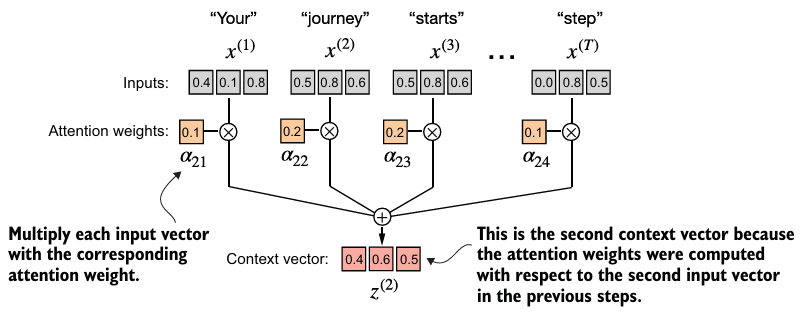

In [1]:
import torch

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], 
   [0.55, 0.87, 0.66], 
   [0.57, 0.85, 0.64], 
   [0.22, 0.58, 0.33], 
   [0.77, 0.25, 0.10], 
   [0.05, 0.80, 0.55]] 
)

In [10]:
atten_score = torch.empty(inputs.shape[0], inputs.shape[0])

# for i, x_i in enumerate(inputs):
#     for j, x_j in enumerate(inputs):

#         # compute dot product each input vector with every other 
#         atten_score[i, j] = torch.dot(x_i, x_j)
 
# double for loop, computationally inefficient

atten_score = inputs @ inputs.T  # 6x3 ~ 3x6 = 6x6
print(atten_score)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [12]:
# apply softmax to get attention weights
atten_weigths = torch.softmax(atten_score, dim=0)
print(atten_weigths)

tensor([[0.2098, 0.1385, 0.1390, 0.1435, 0.1526, 0.1385],
        [0.2006, 0.2379, 0.2369, 0.2074, 0.1958, 0.2184],
        [0.1981, 0.2333, 0.2326, 0.2046, 0.1975, 0.2128],
        [0.1242, 0.1240, 0.1242, 0.1462, 0.1367, 0.1420],
        [0.1220, 0.1082, 0.1108, 0.1263, 0.1879, 0.0988],
        [0.1452, 0.1581, 0.1565, 0.1720, 0.1295, 0.1896]])


In [18]:
contex_vectors = atten_weigths @ inputs # 6x6 ~ 6x3 = 6x3
print(contex_vectors)

tensor([[0.4017, 0.5023, 0.5059],
        [0.5595, 0.7824, 0.6953],
        [0.5538, 0.7686, 0.6834],
        [0.3369, 0.4647, 0.4119],
        [0.3525, 0.4059, 0.3657],
        [0.3856, 0.5761, 0.5077]])
